In [59]:
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [55]:
path = "/Users/coes3/phd-labs/fraganal/data_source/radar/"
files = Path(path).glob('IPVersions*.csv')

In [56]:
dfs = []
for i in files:
    data = pd.read_csv(i, index_col=None, header=0)
    data['cc'] = i.name.split('_')[-1].strip('.csv')
    dfs.append(data)
    

IPVersions_2022-2023_CN.csv
IPVersions_2022-2023_IN.csv
IPVersions_2022-2023_RW.csv
IPVersions_2022-2023_IQ.csv
IPVersions_2022-2023_DE.csv
IPVersions_2022-2023_BR.csv


In [57]:
df = pd.concat(dfs, ignore_index=True)

In [76]:
df.rename(columns={0:"date", "Serie_0  I Pv4":"IPv4", "Serie_0  I Pv6":"IPv6"}, inplace = True)

In [79]:
cc_df = df.loc[df['cc'] == "CN"]

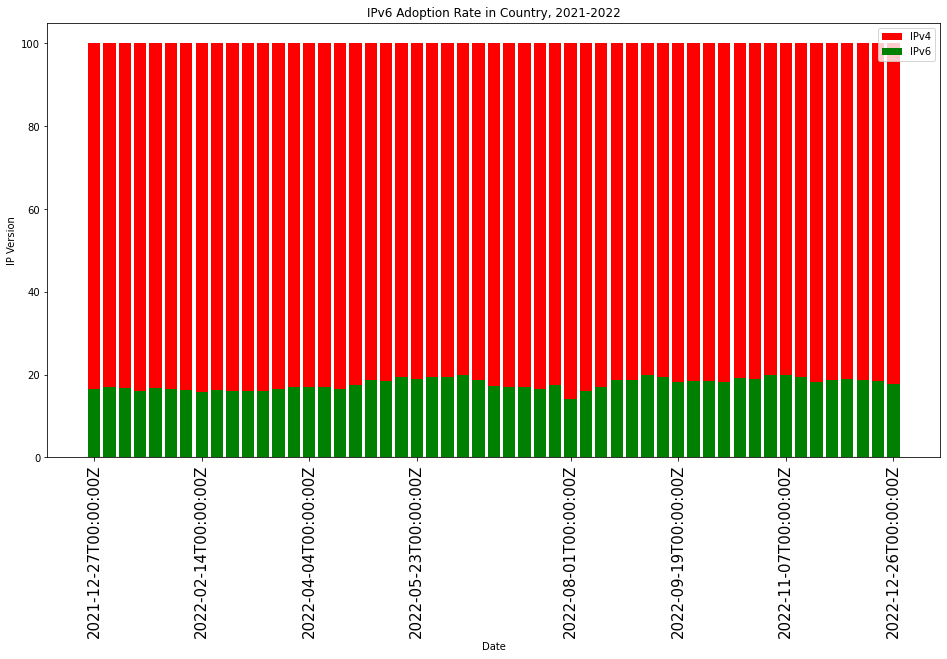

In [114]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(cc_df.date.values, cc_df['IPv4'].values, color='red', label = 'IPv4', bottom=cc_df['IPv6'])
ax.bar(cc_df.date.values, cc_df['IPv6'].values, color='green', label = 'IPv6')
ax.set(xlabel="Date", ylabel="IP Version",
       title="IPv6 Adoption Rate in Country, 2021-2022")

# Format the x axis
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_tick_params(labelsize=15,rotation=90)
#ax.axvspan('2021-01-12', '2021-01-17', facecolor='grey', alpha=0.5)
ax.legend()

plt.show()

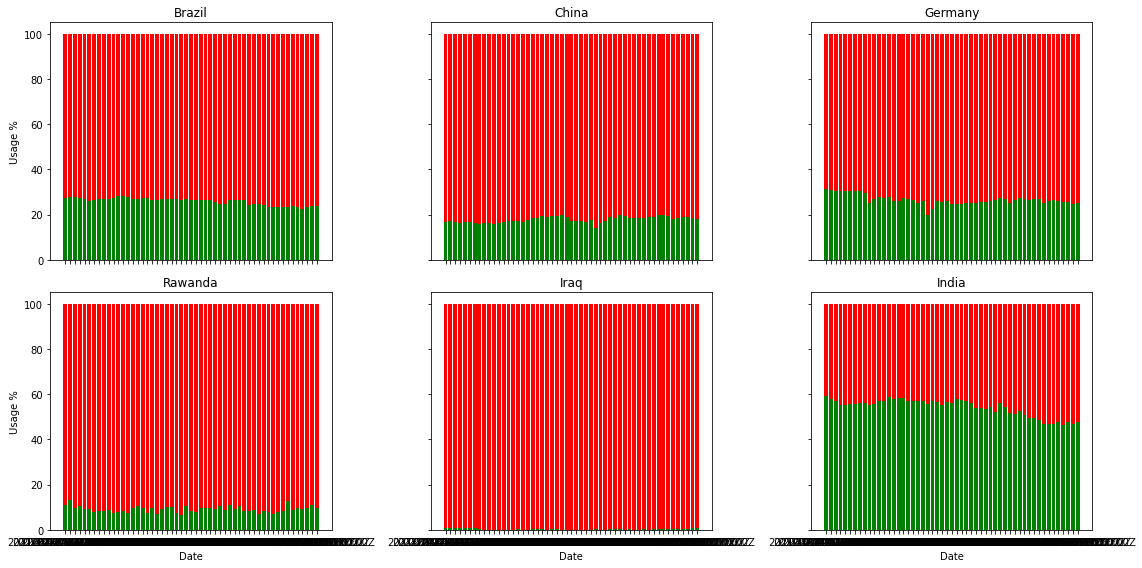

In [117]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs[0, 0].bar(df.loc[df['cc'] == "BR"].date.values, df.loc[df['cc'] == "BR"].IPv4.values, color='red', label = 'IPv4', bottom=df.loc[df['cc'] == "BR"].IPv6.values)
axs[0, 0].bar(df.loc[df['cc'] == "BR"].date.values, df.loc[df['cc'] == "BR"].IPv6.values, color='green', label = 'IPv6')
axs[0, 0].set_title('Brazil')

axs[0, 1].bar(df.loc[df['cc'] == "CN"].date.values, df.loc[df['cc'] == "CN"].IPv4.values, color='red', label = 'IPv4', bottom=df.loc[df['cc'] == "CN"].IPv6.values)
axs[0, 1].bar(df.loc[df['cc'] == "CN"].date.values, df.loc[df['cc'] == "CN"].IPv6.values, color='green', label = 'IPv6')
axs[0, 1].set_title('China')

axs[0, 2].bar(df.loc[df['cc'] == "DE"].date.values, df.loc[df['cc'] == "DE"].IPv4.values, color='red', label = 'IPv4', bottom=df.loc[df['cc'] == "DE"].IPv6.values)
axs[0, 2].bar(df.loc[df['cc'] == "DE"].date.values, df.loc[df['cc'] == "DE"].IPv6.values, color='green', label = 'IPv6')
axs[0, 2].set_title('Germany')

axs[1, 0].bar(df.loc[df['cc'] == "RW"].date.values, df.loc[df['cc'] == "RW"].IPv4.values, color='red', label = 'IPv4', bottom=df.loc[df['cc'] == "RW"].IPv6.values)
axs[1, 0].bar(df.loc[df['cc'] == "RW"].date.values, df.loc[df['cc'] == "RW"].IPv6.values, color='green', label = 'IPv6')
axs[1, 0].set_title('Rawanda')

axs[1, 1].bar(df.loc[df['cc'] == "IQ"].date.values, df.loc[df['cc'] == "IQ"].IPv4.values, color='red', label = 'IPv4', bottom=df.loc[df['cc'] == "IQ"].IPv6.values)
axs[1, 1].bar(df.loc[df['cc'] == "IQ"].date.values, df.loc[df['cc'] == "IQ"].IPv6.values, color='green', label = 'IPv6')
axs[1, 1].set_title('Iraq')

axs[1, 2].bar(df.loc[df['cc'] == "IN"].date.values, df.loc[df['cc'] == "IN"].IPv4.values, color='red', label = 'IPv4', bottom=df.loc[df['cc'] == "IN"].IPv6.values)
axs[1, 2].bar(df.loc[df['cc'] == "IN"].date.values, df.loc[df['cc'] == "IN"].IPv6.values, color='green', label = 'IPv6')
axs[1, 2].set_title('India')


for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Usage %')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.tight_layout()